Mounting data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sweetviz

Necessary Imports & Requirements

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix



In [ ]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 23
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

Reading Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Paid Task Coding Part/Classification/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking Null/missing values

In [ ]:
# Checking null Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print("dimension of diabetes data: {}".format(df.shape))

dimension of diabetes data: (768, 9)


In [ ]:
sv.analyze([df,'Diabetes data' ], target_feat='Outcome').show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Data Visualization

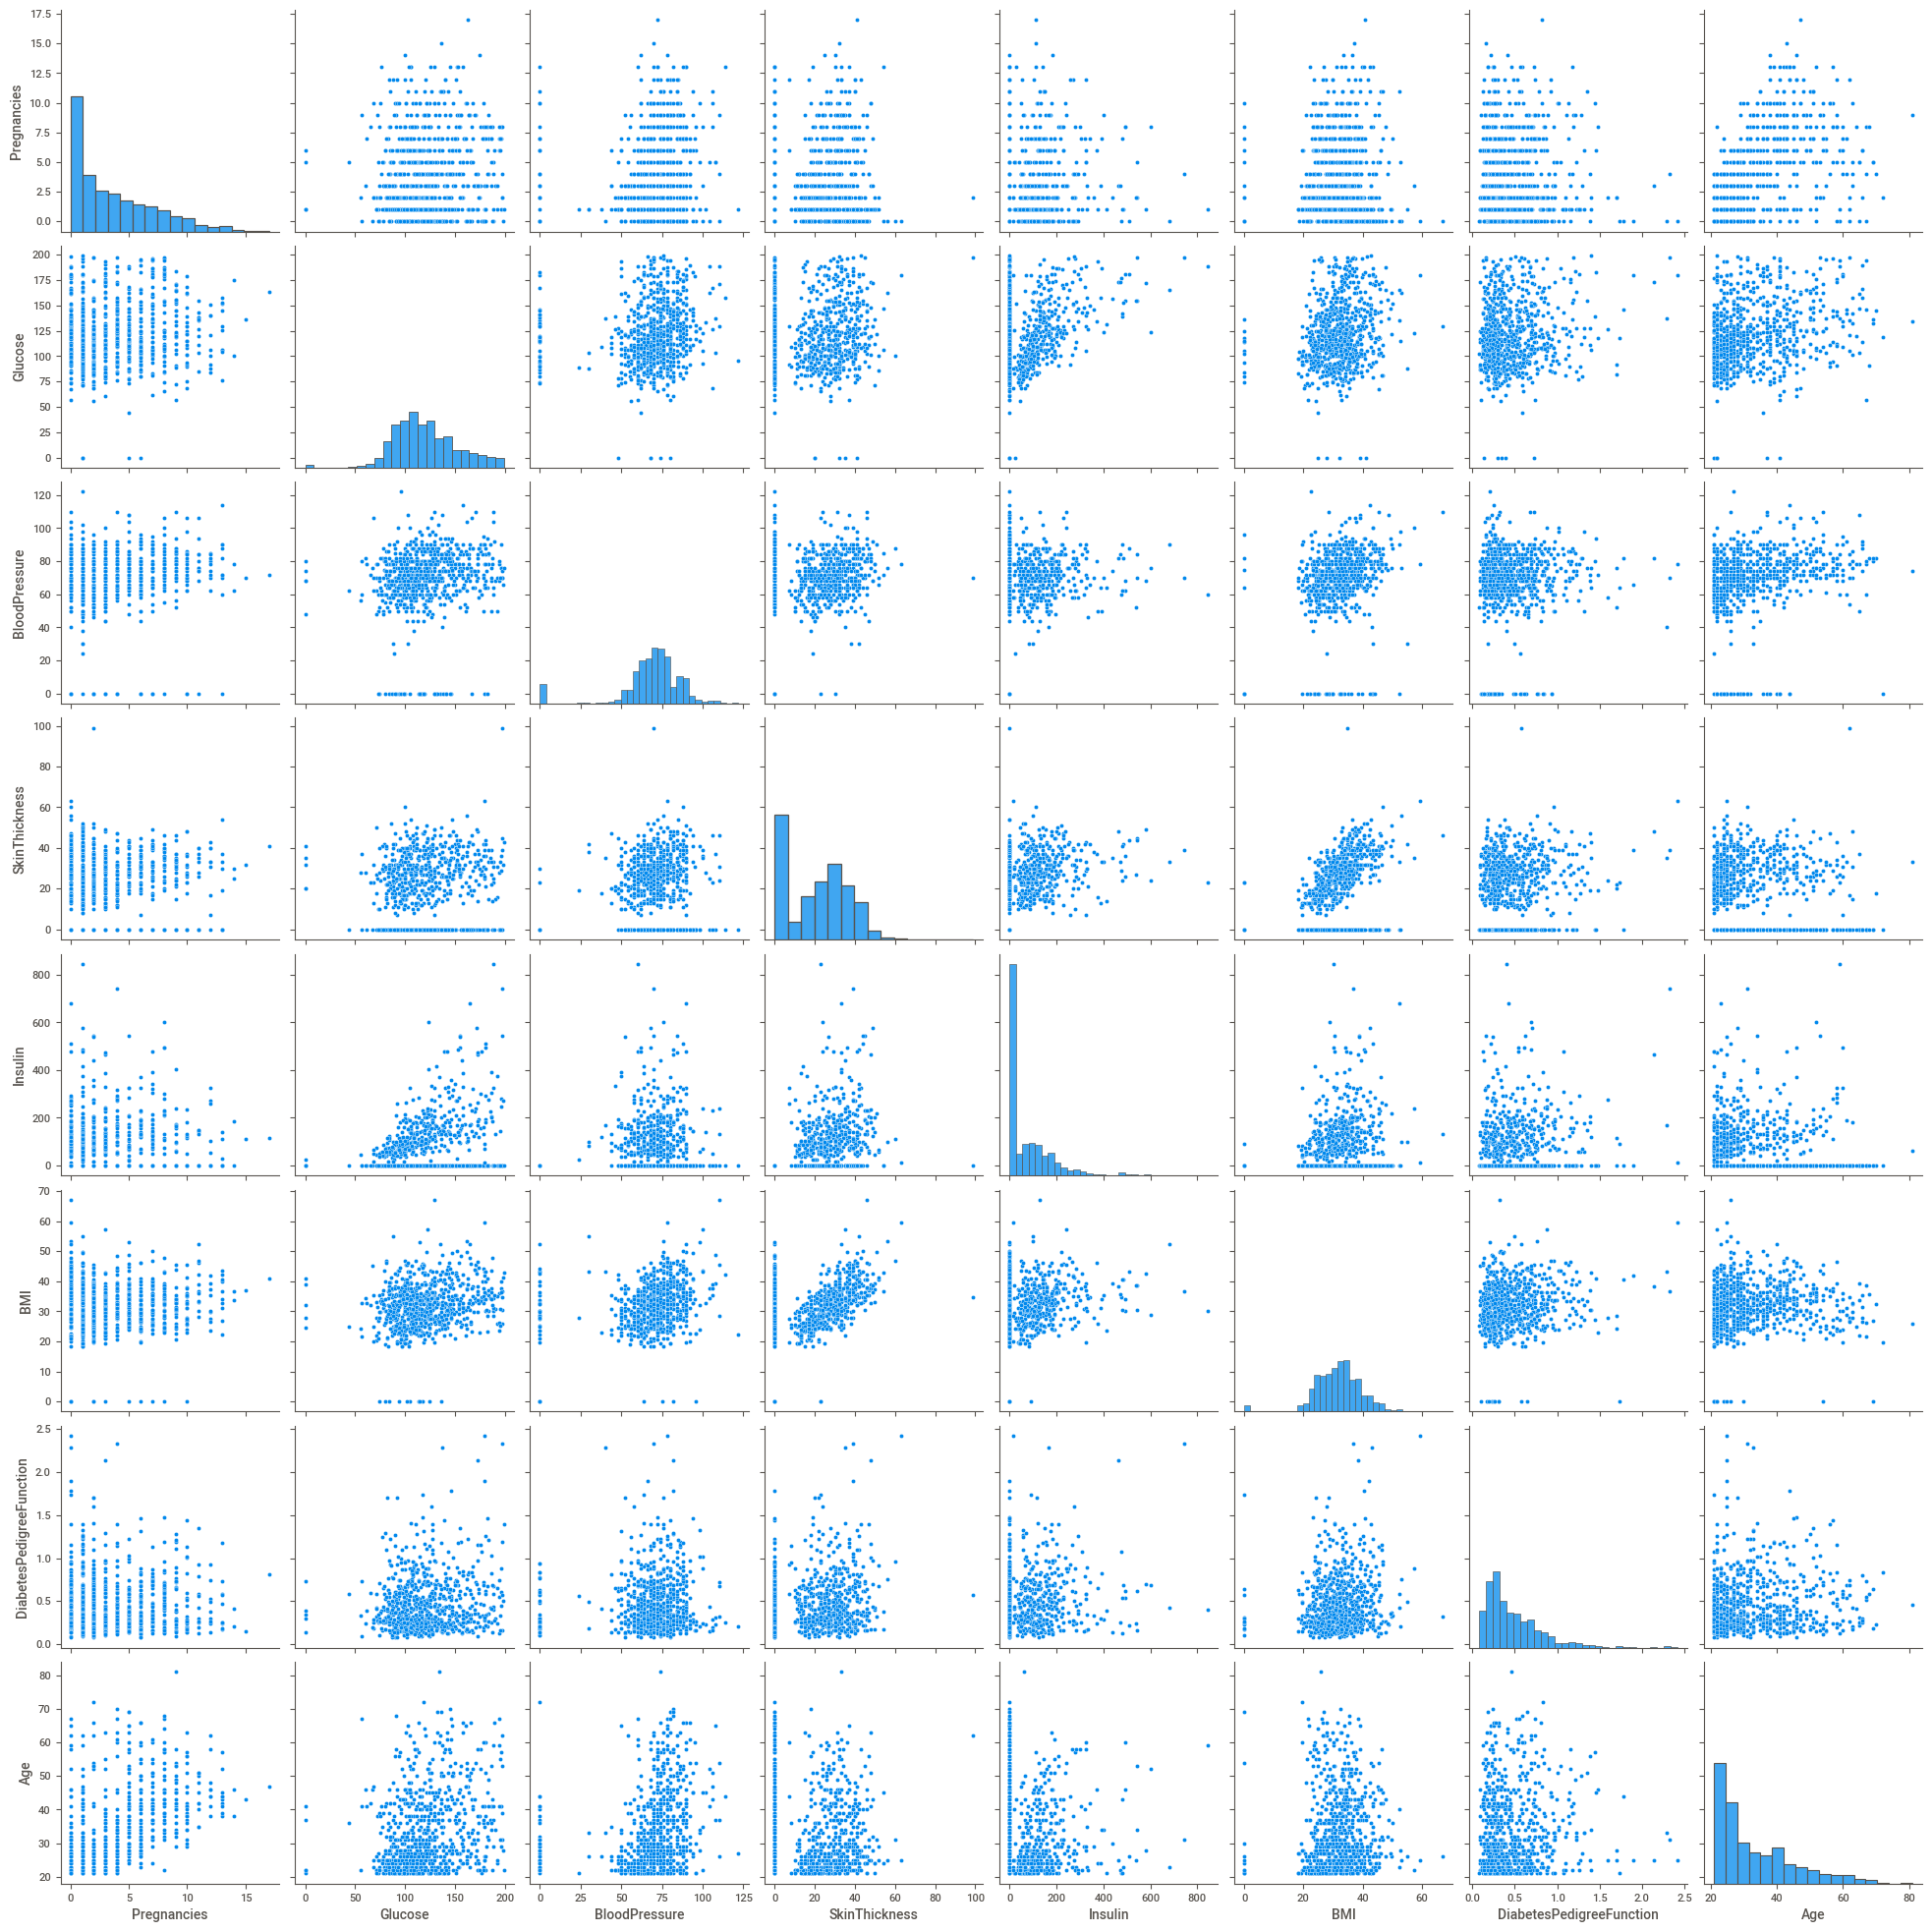

In [ ]:
sns.pairplot(df.iloc[:,:-1], diag_kind='hist')

<ipython-input-13-43638f91697a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], ax=axes[i//4, i%4],shade='fill')
<ipython-input-13-43638f91697a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], ax=axes[i//4, i%4],shade='fill')
<ipython-input-13-43638f91697a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], ax=axes[i//4, i%4],shade='fill')
<ipython-input-13-43638f91697a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], ax=axes[i//4, i%4],shade='fil

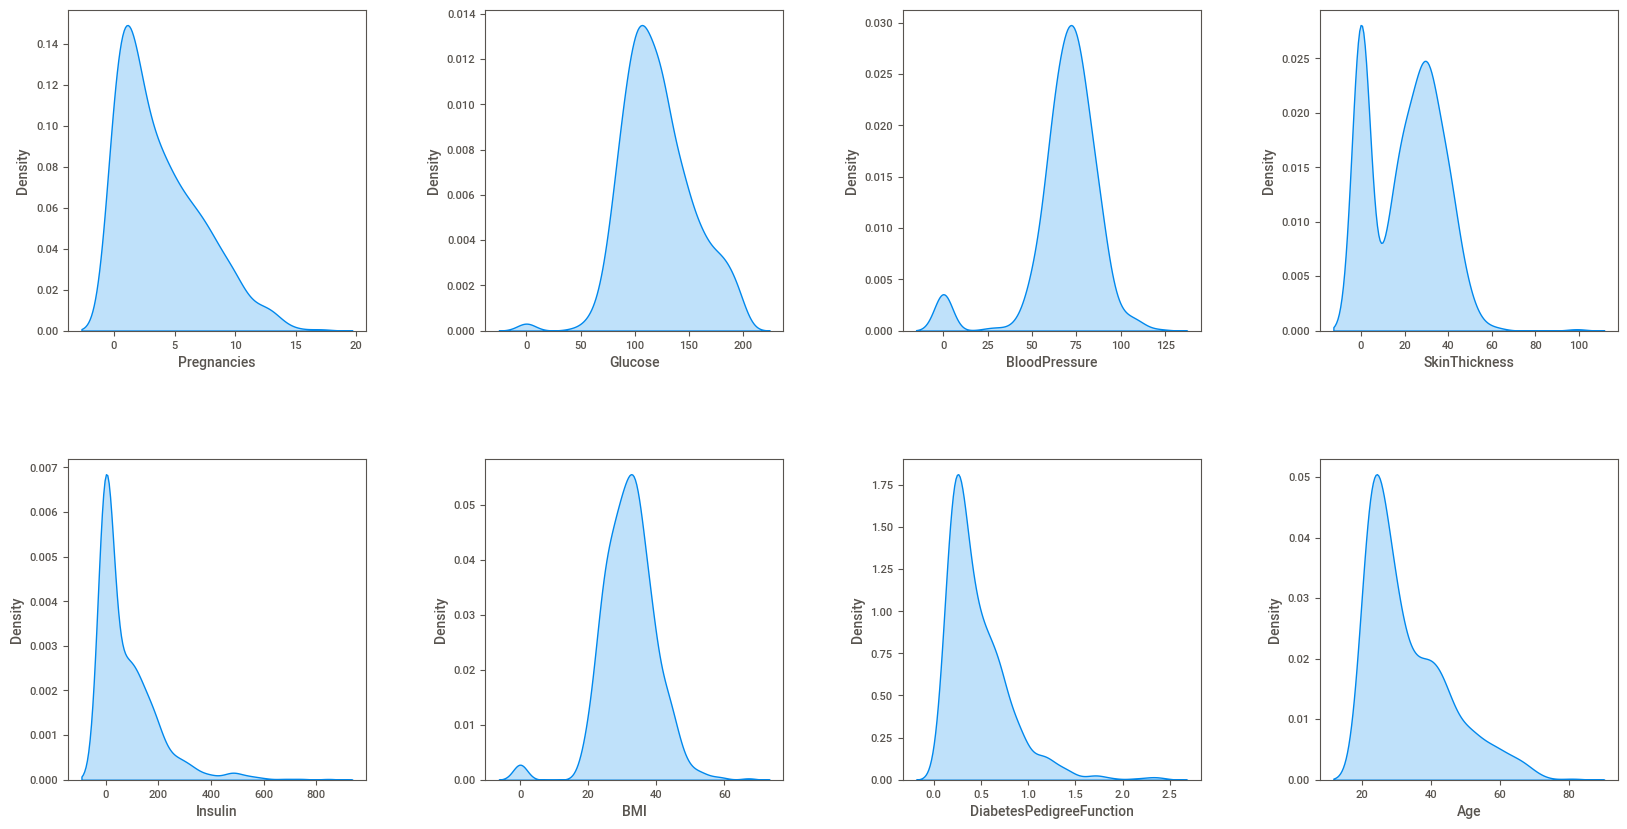

In [ ]:
# Visualizing Kernel Density Estimator for each feature
features = df.columns[:-1]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

for i, feature in enumerate(features):
    sns.kdeplot(df[feature], ax=axes[i//4, i%4],shade='fill')

plt.show()

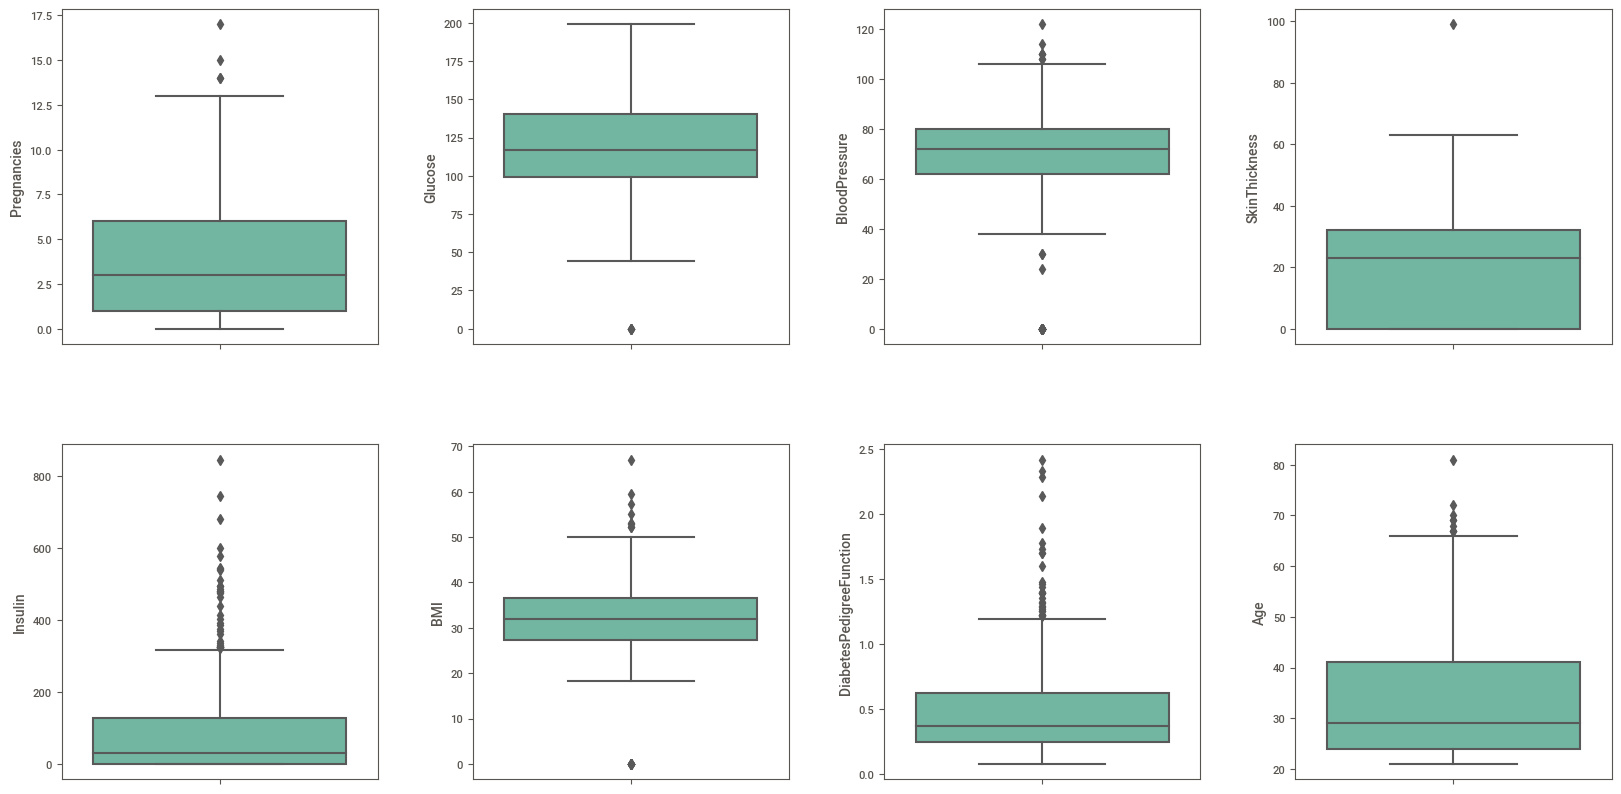

In [ ]:
# Visualizing Boxplot of each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i//4, i%4],palette='Set2')

plt.show()

<ipython-input-15-e753be77c9a5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df[feature], x=df['Outcome'], ax=axes[i//4, i%4],palette='Set1')
<ipython-input-15-e753be77c9a5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df[feature], x=df['Outcome'], ax=axes[i//4, i%4],palette='Set1')
<ipython-input-15-e753be77c9a5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df[feature], x=df['Outcome'], ax=axes[i//4, i%4],palette='Set1')
<ipython-input-15-e753be77c9a5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df[feature], x=df['Outcome'], ax=axes[i//4, i%4],palette='Set1')
<ipython-input-15-e753be77c9a5>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df[feature], x=df['Outcome'], ax=axes[i//4, i%4],palette='Set1')
<ipython-input-

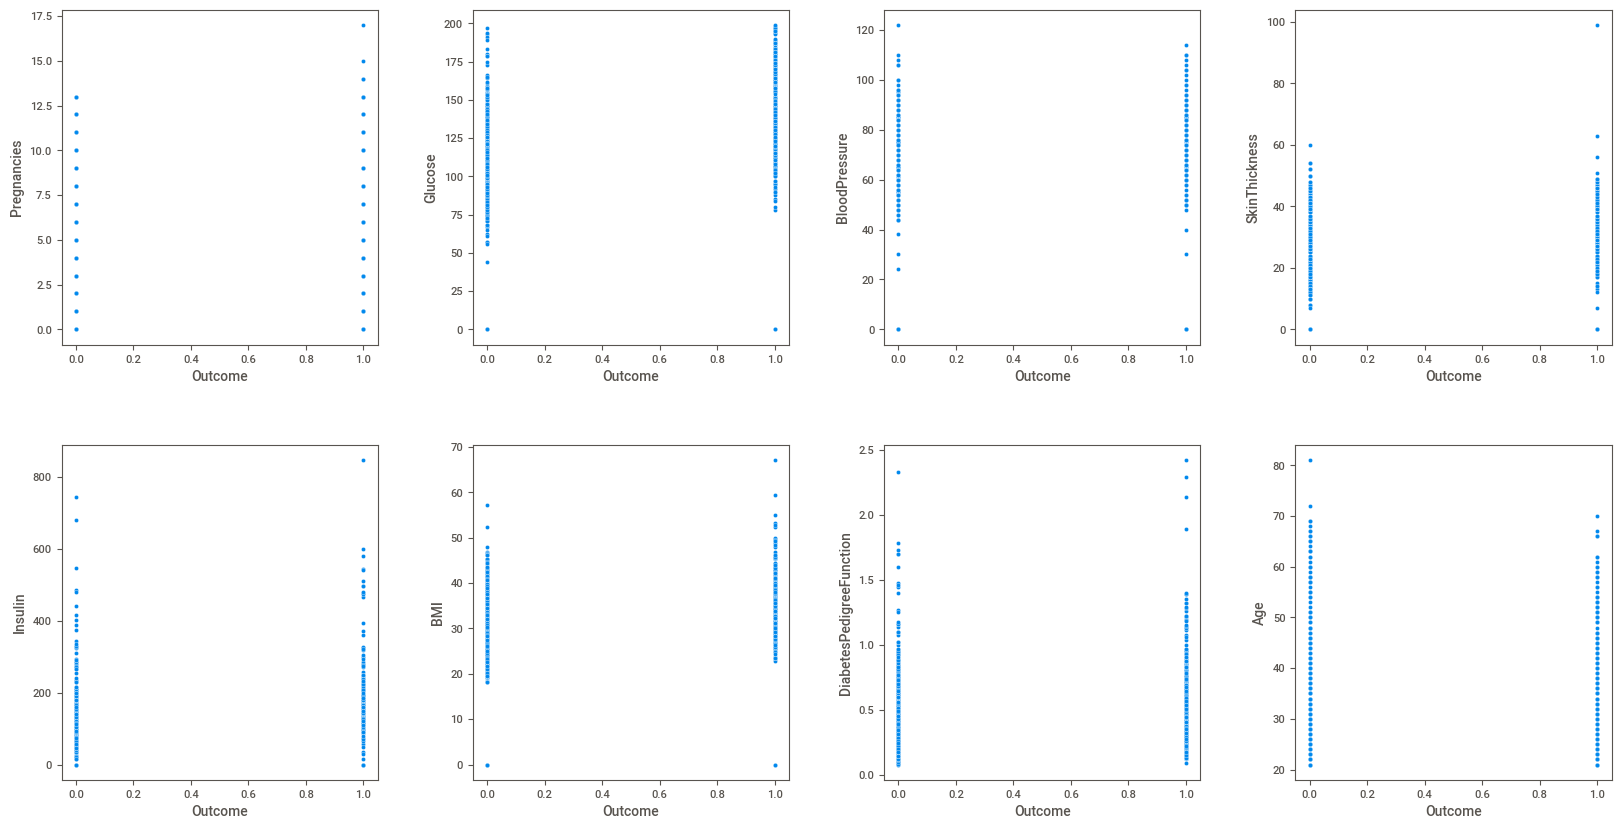

In [ ]:
# Visualizing features relationship with outcome
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, feature in enumerate(features):
    sns.scatterplot(y=df[feature], x=df['Outcome'], ax=axes[i//4, i%4],palette='Set1')

plt.show()

In [ ]:
# Outcome features destribtuion
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Correlation matrix

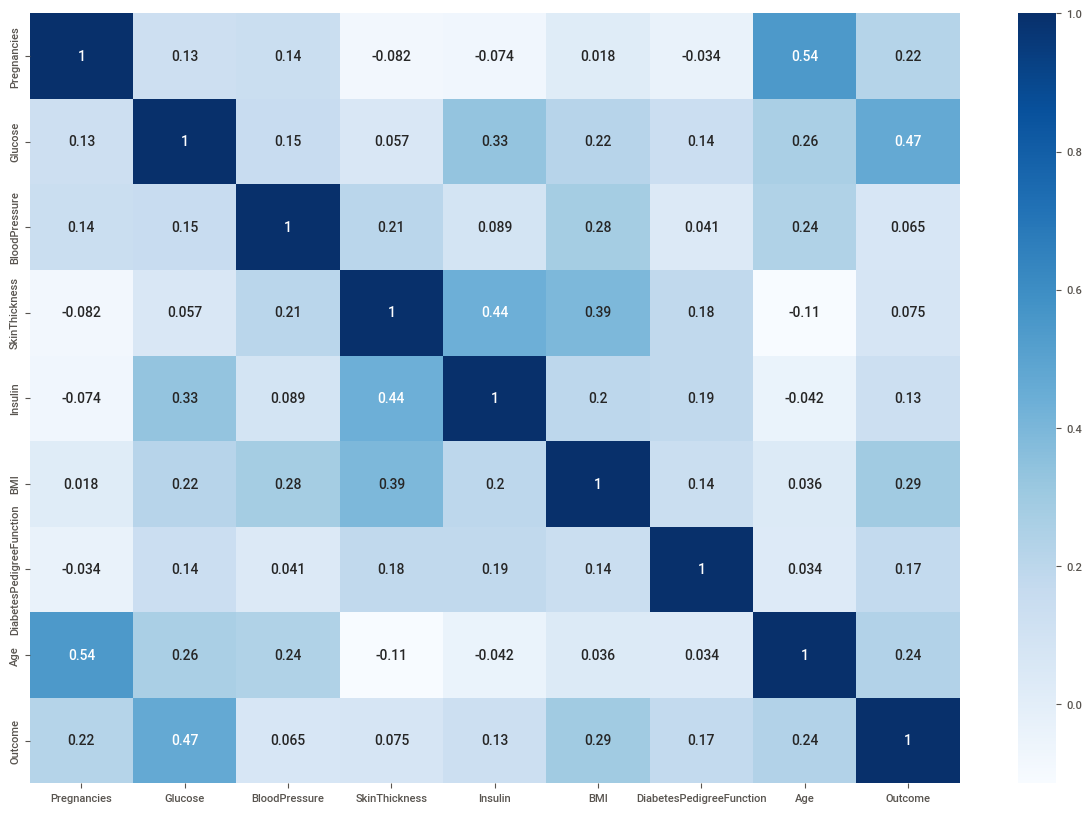

In [ ]:
# Visualizing Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

Pearson Correlation matrix

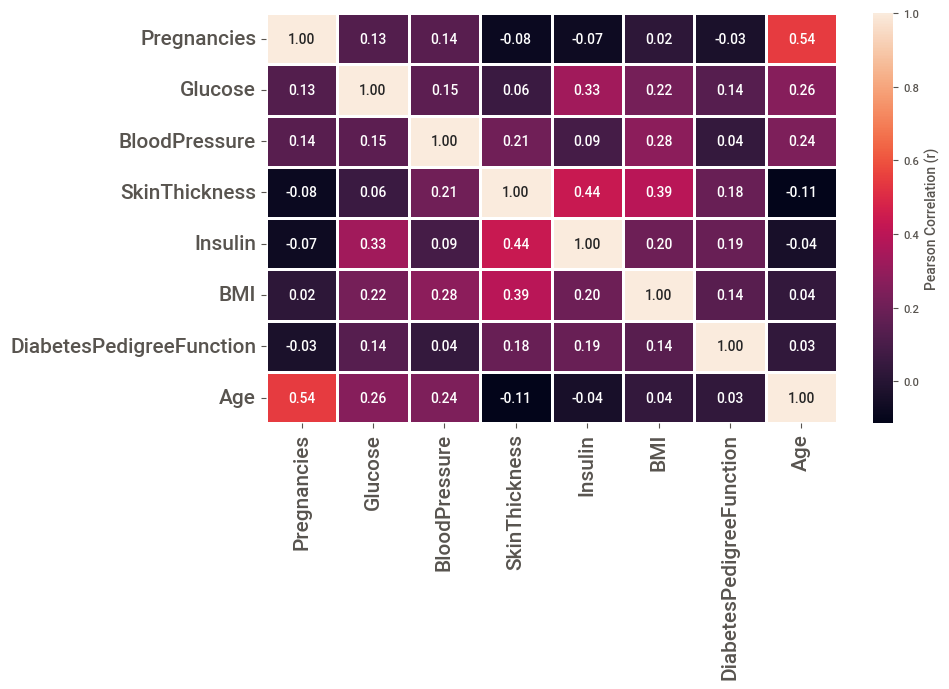

In [ ]:
plt.figure(figsize=(10,7))
corr_mat = df.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

In [ ]:
print(df['Outcome'].unique())


[1 0]


Classification label count

<Axes: xlabel='Outcome', ylabel='count'>

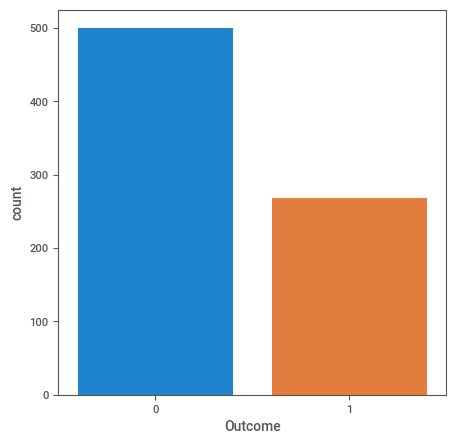

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outcome', data=df, label='Count')


Classification distribution

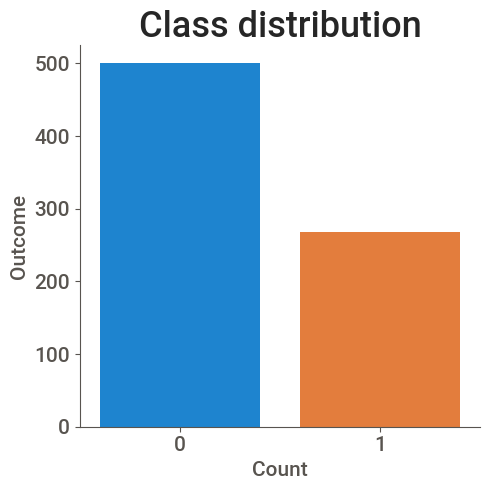

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.countplot(x='Outcome', data=df, label='Count')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Outcome',size=15)
plt.xlabel('Count',size=15)
sns.despine(top=True)
plt.title('Class distribution',size=26, weight='bold')
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
#X = df.iloc[:,:-1].values   ##features selection
#y = df.iloc[:,-1].values    ## target selection
X= df.drop("Outcome",axis=1)
y= df["Outcome"]

Train Test spilt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.3, random_state=27)

In [ ]:
X_train.shape

(537, 8)

In [ ]:
X_test.shape

(231, 8)

#ML Model

#KNN

In [ ]:
training_accuracy = []
test_accuracy = []
training_f1 = []
test_f1 = []

neighbors_settings = range(2,20)

for n_neighbors in neighbors_settings:
    print(f'working on neighbors {n_neighbors}')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_train_pred=knn.predict(X_train)
    y_pred=knn.predict(X_test)

    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    #print(training_accuracy.append(accuracy_score(y_train,y_train_pred)))
    test_accuracy.append(accuracy_score(y_test, y_pred))

    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))
    print(training_accuracy)

working on neighbors 2
[0.8491620111731844]
working on neighbors 3
[0.8491620111731844, 0.8379888268156425]
working on neighbors 4
[0.8491620111731844, 0.8379888268156425, 0.7988826815642458]
working on neighbors 5
[0.8491620111731844, 0.8379888268156425, 0.7988826815642458, 0.8007448789571695]
working on neighbors 6
[0.8491620111731844, 0.8379888268156425, 0.7988826815642458, 0.8007448789571695, 0.7951582867783985]
working on neighbors 7
[0.8491620111731844, 0.8379888268156425, 0.7988826815642458, 0.8007448789571695, 0.7951582867783985, 0.7877094972067039]
working on neighbors 8
[0.8491620111731844, 0.8379888268156425, 0.7988826815642458, 0.8007448789571695, 0.7951582867783985, 0.7877094972067039, 0.7951582867783985]
working on neighbors 9
[0.8491620111731844, 0.8379888268156425, 0.7988826815642458, 0.8007448789571695, 0.7951582867783985, 0.7877094972067039, 0.7951582867783985, 0.8026070763500931]
working on neighbors 10
[0.8491620111731844, 0.8379888268156425, 0.7988826815642458, 0.8

[0.8491620111731844, 0.8379888268156425, 0.7988826815642458, 0.8007448789571695, 0.7951582867783985, 0.7877094972067039, 0.7951582867783985, 0.8026070763500931, 0.7839851024208566, 0.7988826815642458, 0.7970204841713222, 0.8100558659217877, 0.7970204841713222, 0.7988826815642458, 0.7839851024208566, 0.7877094972067039, 0.776536312849162, 0.7783985102420856]


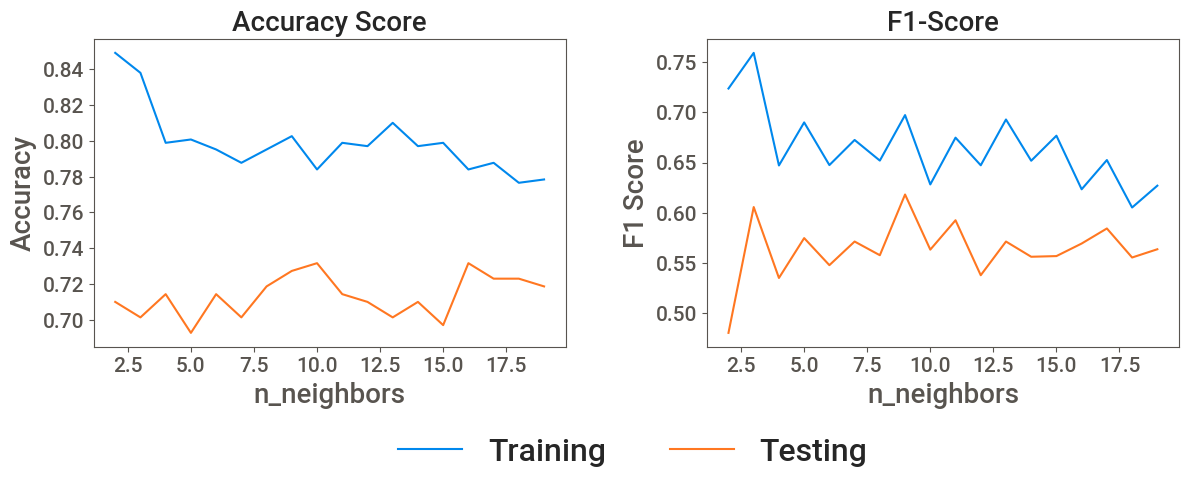

In [ ]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('n_neighbors',size=20)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(neighbors_settings, training_f1)
plt.plot(neighbors_settings, test_f1)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('F1 Score',size=20)
plt.xlabel('n_neighbors',size=20)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);
print(training_accuracy)

Model accuracy & Classification report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train, X_test, y_train, y_test defined

knn = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.62      0.52      0.56        81

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231

Accuracy: 0.7186147186147186


Confusion Matrix

In [ ]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

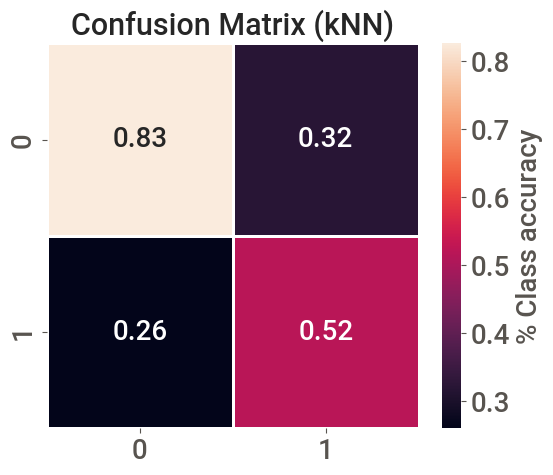

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'kNN')

K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming you have already defined knn, X, and y

k_fold_knn_accuracy = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation
k_fold_knn_f1 = cross_val_score(knn, X, y, cv=10, scoring='f1_macro')  # 10-fold cross-validation

print(f'Average accuracy after 10-fold cross-validation: {k_fold_knn_accuracy.mean().round(2)} +/- {k_fold_knn_accuracy.std().round(2)}')
print(f'Average F1-score after 10-fold cross-validation: {k_fold_knn_f1.mean().round(2)} +/- {k_fold_knn_f1.std().round(2)}')


Average accuracy after 10-fold cross-validation: 0.75 +/- 0.06
Average F1-score after 10-fold cross-validation: 0.71 +/- 0.07


#Decision Tree

In [ ]:
max_depth=range(1,20)
training_accuracy = []
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth :
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_pred = tree.predict(X_test)

    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))

    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

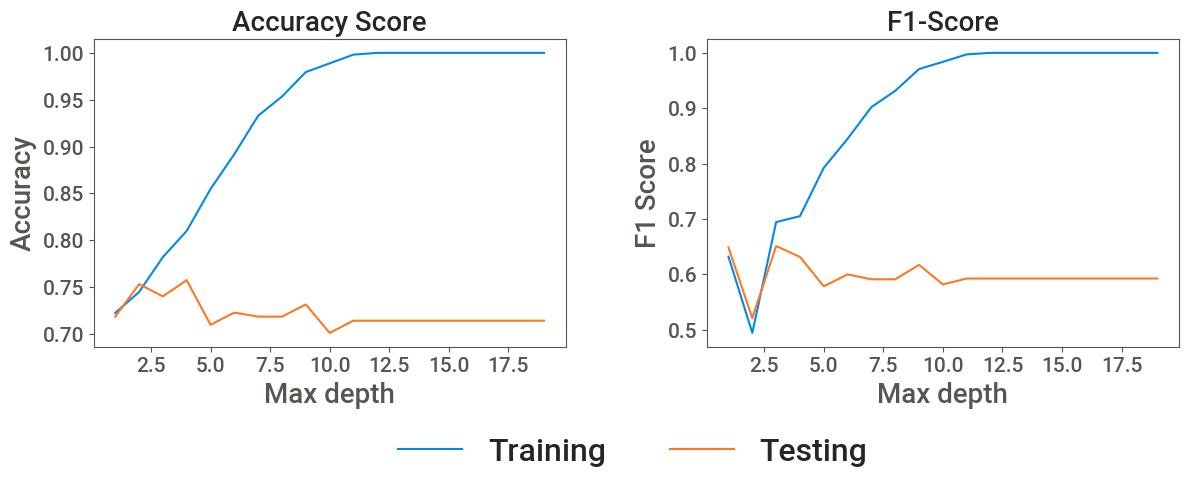

In [ ]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy, label='training accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);

Model accuracy & Classification report

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_pred=tree.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy on test: 0.758
F1-score on test set: 0.632
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.59      0.63        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

Accuracy: 0.7575757575757576


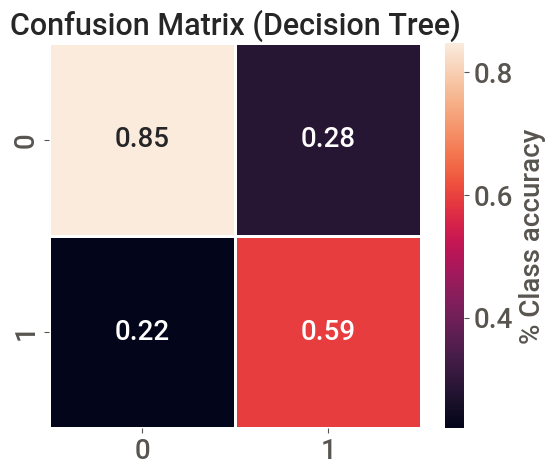

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Decision Tree')

K-Fold validation ( 5 fold)

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming you have already defined tree, X, and y

k_fold_tree_accuracy = cross_val_score(tree, X, y, cv=10)  # 10-fold cross-validation
k_fold_tree_f1 = cross_val_score(tree, X, y, cv=10, scoring='f1_macro')  # 10-fold cross-validation

print(f'Average accuracy after 10-fold cross-validation: {k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10-fold cross-validation: {k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')


Average accuracy after 10-fold cross-validation: 0.72 +/- 0.04
Average F1-score after 10-fold cross-validation: 0.69 +/- 0.05


#Random Forest

Model accuracy & Classification Report

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred=rf.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

print("Classification Report:")
print(classification_report(y_test, y_pred))
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy on test: 0.775
F1-score on test set: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       150
           1       0.68      0.67      0.68        81

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

Accuracy: 0.7748917748917749


Confusion Matrix

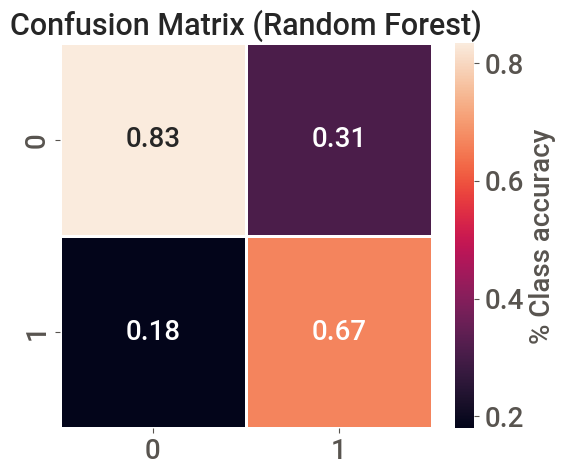

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Random Forest')

K-Fold validation ( 5 Fold )

In [ ]:
k_fold_rf_accuracy = cross_val_score(rf, X, y, cv=5)  # 10-fold cross-validation
k_fold_rf_f1 = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')  # 10-fold cross-validation

print(f'Average accuracy after 10-fold cross-validation: {k_fold_rf_accuracy.mean().round(2)} +/- {k_fold_rf_accuracy.std().round(2)}')
print(f'Average F1-score after 10-fold cross-validation: {k_fold_rf_f1.mean().round(2)} +/- {k_fold_rf_f1.std().round(2)}')

Average accuracy after 10-fold cross-validation: 0.78 +/- 0.03
Average F1-score after 10-fold cross-validation: 0.74 +/- 0.04


#SVM

Model accuracy & Classification Report

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#SVM requiest feature scaling
svc = SVC(C=1000, gamma='auto').fit(X_train_scaled, y_train)
y_pred=svc.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on train: 0.808
Accuracy on test: 0.745
F1-score on test set: 0.582
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



Confusion Matrix

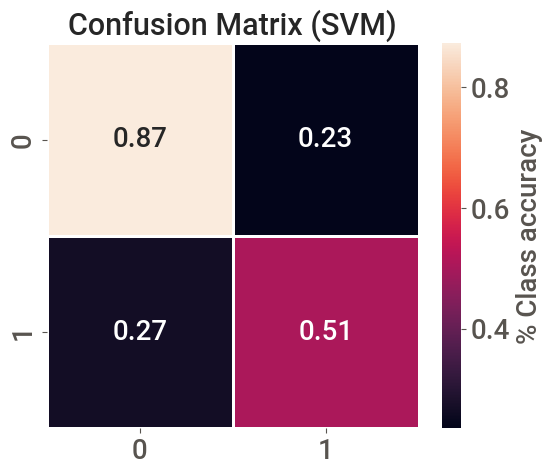

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'SVM')

K- Fold validation ( 5-Fold)

In [ ]:
k_fold_svm_accuracy = cross_val_score(svc, X, y, cv=5)  # 10-fold cross-validation
k_fold_svm_f1 = cross_val_score(svc, X, y, cv=5, scoring='f1_macro')  # 10-fold cross-validation

print(f'Average accuracy after 10-fold cross-validation: {k_fold_svm_accuracy.mean().round(2)} +/- {k_fold_svm_accuracy.std().round(2)}')
print(f'Average F1-score after 10-fold cross-validation: {k_fold_svm_f1.mean().round(2)} +/- {k_fold_svm_f1.std().round(2)}')

Average accuracy after 10-fold cross-validation: 0.65 +/- 0.0
Average F1-score after 10-fold cross-validation: 0.39 +/- 0.0


#Naive Bayes

Model accuracy & Classification Report

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes classifier
naive_bayes = GaussianNB().fit(X_train_scaled, y_train)
y_pred_nb = naive_bayes.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy on train: {:.3f}".format(naive_bayes.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_test, y_pred_nb)))
print("F1-score on test set: {:.3f}".format(f1_score(y_test, y_pred_nb)))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Accuracy on train: 0.747
Accuracy on test: 0.762
F1-score on test set: 0.658
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       150
           1       0.66      0.65      0.66        81

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



Confusion Matrix

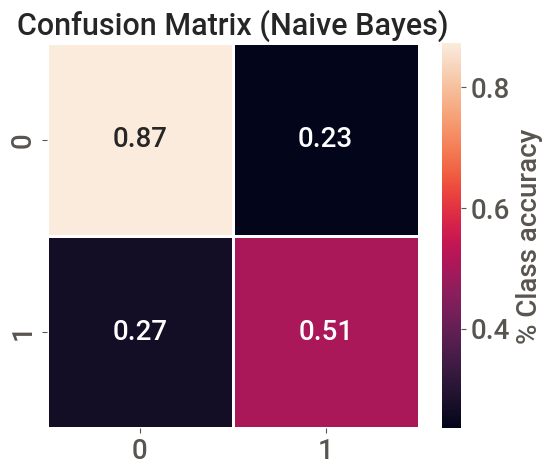

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Naive Bayes')

K-Fold Validation with 5 fold

In [ ]:
k_fold_nb_accuracy = cross_val_score(naive_bayes, X, y, cv=5)  # 5-fold cross-validation
k_fold_nb_f1 = cross_val_score(naive_bayes, X, y, cv=5, scoring='f1_macro')  # 5-fold cross-validation

print(f'Average accuracy after 5-fold cross-validation: {k_fold_nb_accuracy.mean().round(2)} +/- {k_fold_nb_accuracy.std().round(2)}')
print(f'Average F1-score after 5-fold cross-validation: {k_fold_nb_f1.mean().round(2)} +/- {k_fold_nb_f1.std().round(2)}')

Average accuracy after 5-fold cross-validation: 0.75 +/- 0.02
Average F1-score after 5-fold cross-validation: 0.72 +/- 0.02


#Model Comparison

In [ ]:

all_accuracies = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_nb_accuracy.mean().round(2),
                   k_fold_tree_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2)]

all_accuracies_errors = [k_fold_knn_accuracy.std().round(2),
                   k_fold_nb_accuracy.std().round(2),
                   k_fold_tree_accuracy.std().round(2),
                   k_fold_rf_accuracy.std().round(2),
                   k_fold_svm_accuracy.std().round(2)]

all_f1 = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_nb_f1.mean().round(2),
                   k_fold_tree_f1.mean().round(2),
                   k_fold_rf_f1.mean().round(2),
                   k_fold_svm_f1.mean().round(2)]

all_f1_errors = [k_fold_knn_f1.std().round(2),
                   k_fold_nb_f1.std().round(2),
                   k_fold_tree_f1.std().round(2),
                   k_fold_rf_f1.std().round(2),
                   k_fold_svm_f1.std().round(2)]

In [ ]:
import pandas as pd

# Assuming you have defined all_accuracies, all_accuracies_errors, all_f1, and all_f1_errors
models = ['kNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM']

model_data = pd.DataFrame({
    "Accuracy": all_accuracies,
    "Accuracy Errors": all_accuracies_errors,
    "F1 Score": all_f1,
    "F1 Score Errors": all_f1_errors
}, index=models)

# Print or further process the model_data DataFrame
print(model_data)


               Accuracy  Accuracy Errors  F1 Score  F1 Score Errors
kNN                0.75             0.06      0.75             0.07
Naive Bayes        0.75             0.02      0.72             0.02
Decision Tree      0.72             0.04      0.69             0.05
Random Forest      0.78             0.03      0.74             0.04
SVM                0.65             0.00      0.39             0.00


In [ ]:
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Accuracy,Accuracy Errors,F1 Score,F1 Score Errors
kNN,0.750000,0.060000,0.750000,0.070000
Naive Bayes,0.750000,0.020000,0.720000,0.020000
Decision Tree,0.720000,0.040000,0.690000,0.050000
Random Forest,0.780000,0.030000,0.740000,0.040000
SVM,0.650000,0.000000,0.390000,0.000000


In [ ]:
styled_model_data = model_data.style.background_gradient(cmap='viridis', axis=0)

# Display the styled DataFrame
styled_model_data

,Accuracy,Accuracy Errors,F1 Score,F1 Score Errors
kNN,0.750000,0.060000,0.750000,0.070000
Naive Bayes,0.750000,0.020000,0.720000,0.020000
Decision Tree,0.720000,0.040000,0.690000,0.050000
Random Forest,0.780000,0.030000,0.740000,0.040000
SVM,0.650000,0.000000,0.390000,0.000000


Model Comparision

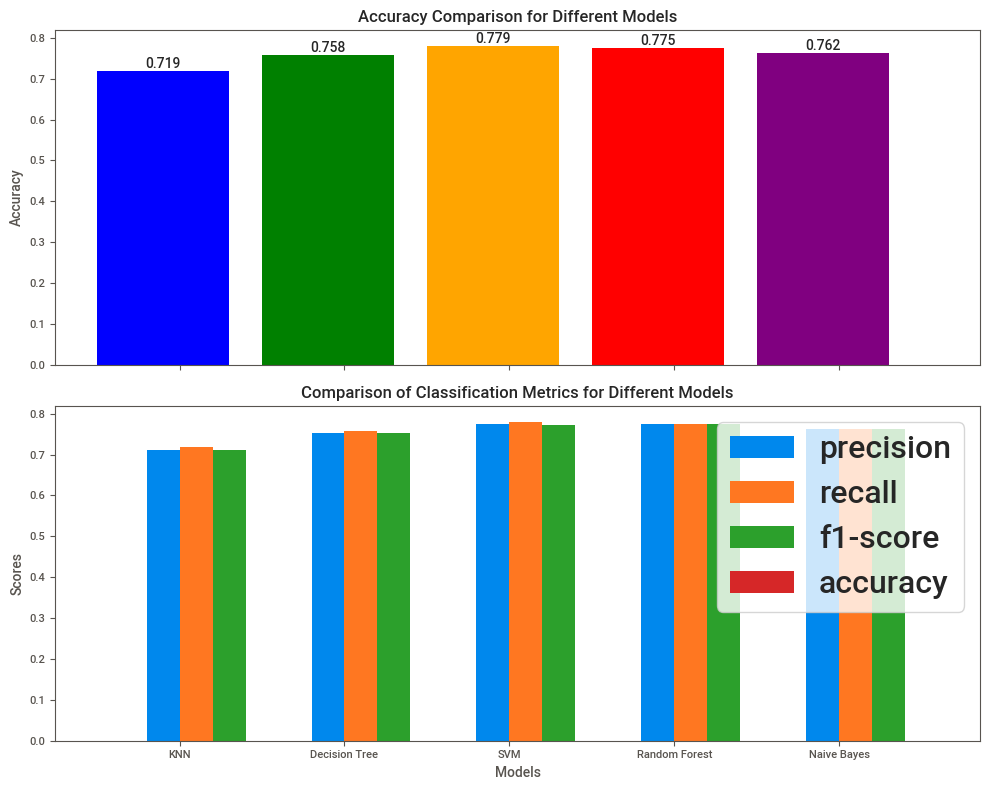

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# Assuming you have X_train, X_test, y_train, y_test defined

# KNN
knn = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# SVM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svc = SVC(C=1000, gamma='auto').fit(X_train_scaled, y_train)
y_pred_svm = svc.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Bayes
naive_bayes = GaussianNB().fit(X_train_scaled, y_train)
y_pred_nb = naive_bayes.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Classification reports
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
tree_report = classification_report(y_test, y_pred_tree, output_dict=True)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)

# Extract metrics
metrics = ['precision', 'recall', 'f1-score', 'accuracy']

# Model names
models = ['KNN', 'Decision Tree', 'SVM', 'Random Forest', 'Naive Bayes']

# Bar plot for classification metrics and accuracy
bar_width = 0.2
index = np.arange(len(models))

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot accuracy
accuracy_scores = [accuracy_knn, accuracy_tree, accuracy_svm, accuracy_rf, accuracy_nb]
bar0 = axs[0].bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple'])
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy Comparison for Different Models')

# Adding the accuracy values on top of the bars
for bar, accuracy in zip(bar0, accuracy_scores):
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.3f}', ha='center', va='bottom')

# Plot other metrics
for i, metric in enumerate(metrics):
    knn_score = knn_report['weighted avg'].get(metric, None)
    tree_score = tree_report['weighted avg'].get(metric, None)
    svm_score = svm_report['weighted avg'].get(metric, None)
    rf_score = rf_report['weighted avg'].get(metric, None)
    nb_score = nb_report['weighted avg'].get(metric, None)

    # Handle the case when the score is None
    scores = [knn_score, tree_score, svm_score, rf_score, nb_score]
    bar1 = axs[1].bar(index + i*bar_width, [score if score is not None else 0 for score in scores], bar_width, label=metric)

axs[1].set_xlabel('Models')
axs[1].set_ylabel('Scores')
axs[1].set_title('Comparison of Classification Metrics for Different Models')
axs[1].set_xticks(index + 0.5*bar_width)
axs[1].set_xticklabels(models)
axs[1].legend()

plt.tight_layout()
plt.show()


Saving the model

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, y_train, and you have trained the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Save the Random Forest classifier to a file using joblib
filename = 'random_forest_classifier.pkl'
joblib.dump(rf_classifier, filename)


['random_forest_classifier.pkl']